ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [115]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.

Ans :
1. Here median is 33.0
IQR is 2.

 2. data will in 29 to 37. but 500> 37. so 500 is an outlier.
 3. The number 500 is an outlier and takes the mean too high.Median is not affected by outliers, so it shows the real middle value.IQR also ignores extreme values and shows the true spread.so, median amd IQR give a better and more useful summary for this data.

#### Q1 Answer (Student)

_Write your calculations and explanation here. You may use Python below if you want, but final reasoning must be readable._


Ans :

Here median is 33.0 IQR is 2.

data will in 29 to 37. but 500> 37. so 500 is an outlier.

The number 500 is an outlier and takes the mean too high.Median is not affected by outliers, so it shows the real middle value.IQR also ignores extreme values and shows the true spread.so, median amd IQR give a better and more useful summary for this data.

In [117]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1

sorted_data = sorted(data_q1)
sorted_data

median = np.median(data_q1)
print(median) #median
q1 = np.percentile(data_q1, 25)
q3 = np.percentile(data_q1, 75)
iqr = q3 - q1
print(iqr) #iqr

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
print(lower, upper)

33.0
2.0
29.0 37.0


### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


In [118]:
#here
sensitivity = 0.90
specificity = 0.92
FPR = 1 - specificity

prob_no_disease1 = 0.01


num1 = sensitivity * prob_no_disease1
den1 = num1 + FPR * (1 - prob_no_disease1)
ppv1 = num1 / den1

prob_no_disease2 = 0.20
num2 = sensitivity * prob_no_disease2
den2 = num2 + FPR * (1 - prob_no_disease2)
ppv2 = num2 / den2

ppv1, ppv2


(0.10204081632653066, 0.737704918032787)

#### Q2 Answer (Student)

_Write your step by step Bayes calculation and explanation here._

When more people have the disease, the chance that a positive test is a true positive increases. its because the part of the formula representing true positives grows faster than the part representing false positives. So, PPV increases when prevalence increases.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

_Write your task type, preprocessing list, and pipeline paragraph here._

Its a binary classificatiob problem, cause the target premium_user has 2 classes-> (0 or 1 target)

2.missing value handle in age or daily clicks.

one hot encoding for region.

Robust scaling for age and daily_click,

splite them into train and test sets for check.


3. Raw data to model:

Recheck and clean missing data or worng data,

scale the all numeric feature and encode all categorical features,

splite into traina nd test data set,

train them,

then evaluate the test set eith accuray,precision, recall and F1,

adjust model if mkore need for new predictions.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [119]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


 missing values, unique values, correlations, and visualize distributions.


In [120]:
#missing value
missing_value = df.isna().sum()
print(missing_value)

#unique values
unique_values = df.nunique()
print(unique_values)

# correlation
numeric_cols = df.select_dtypes(include='number')
correlation = numeric_cols.corr()
print(correlation)



age             2
region          0
purchases       1
premium_user    0
dtype: int64
age             5
region          4
purchases       6
premium_user    2
dtype: int64
                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000


Histogram for purchases and bar chart for region.

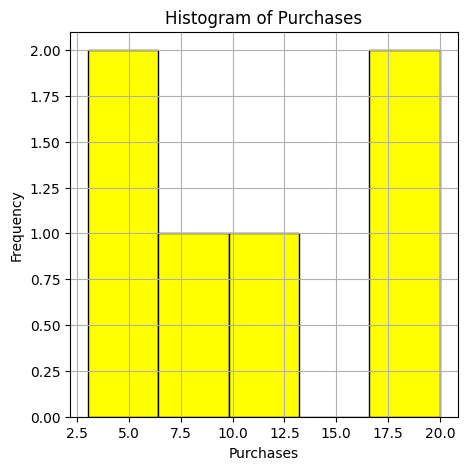

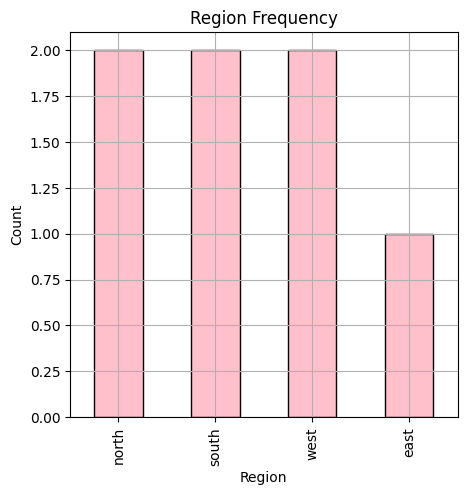

In [121]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(5,5))
plt.hist(df['purchases'].dropna(), bins=5, color='yellow',edgecolor='black')
plt.title('Histogram of Purchases')
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.show()

# Bar chart
plt.figure(figsize=(5,5))
df['region'].value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.title('Region Frequency')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


Impute missing age with median

In [123]:
# 2. Preprocess the dataset using sklearn plus pandas (9 marks)

age_median = df['age'].median() #with median
df['age'] = df['age'].fillna(age_median)
print(df)


    age region  purchases  premium_user
0  25.0  north        3.0             0
1  30.0  south       10.0             1
2  30.0  north        5.0             0
3  22.0   east        NaN             0
4  45.0   west       20.0             1
5  52.0   west       18.0             1
6  30.0  south        9.0             0


Impute missing purchases with mean


In [124]:
#with mean
purchase_mean = df['purchases'].mean()
df['purchases'] = df['purchases'].fillna(purchase_mean)
print(df)


    age region  purchases  premium_user
0  25.0  north   3.000000             0
1  30.0  south  10.000000             1
2  30.0  north   5.000000             0
3  22.0   east  10.833333             0
4  45.0   west  20.000000             1
5  52.0   west  18.000000             1
6  30.0  south   9.000000             0


 One-hot encode region

In [125]:
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)
print(df_encoded)

    age  purchases  premium_user  region_north  region_south  region_west
0  25.0   3.000000             0          True         False        False
1  30.0  10.000000             1         False          True        False
2  30.0   5.000000             0          True         False        False
3  22.0  10.833333             0         False         False        False
4  45.0  20.000000             1         False         False         True
5  52.0  18.000000             1         False         False         True
6  30.0   9.000000             0         False          True        False


Scale numeric columns using RobustScaler

In [126]:
numeric_cols = ['age', 'purchases']
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df)

   age region  purchases  premium_user
0 -0.5  north  -0.943820             0
1  0.0  south   0.000000             1
2  0.0  north  -0.674157             0
3 -0.8   east   0.112360             0
4  1.5   west   1.348315             1
5  2.2   west   1.078652             1
6  0.0  south  -0.134831             0


In [127]:
high_spender_list = []

for purchase in df['purchases']:
    if purchase > 10:
        high_spender_list.append(1)
    else:
        high_spender_list.append(0)

df['high_spender'] = high_spender_list

print(df[['purchases', 'high_spender']])


   purchases  high_spender
0  -0.943820             0
1   0.000000             0
2  -0.674157             0
3   0.112360             0
4   1.348315             0
5   1.078652             0
6  -0.134831             0


Final DataFrame ready for model training

In [129]:
df_final = df.copy()
print(df_final)

   age region  purchases  premium_user  high_spender
0 -0.5  north  -0.943820             0             0
1  0.0  south   0.000000             1             0
2  0.0  north  -0.674157             0             0
3 -0.8   east   0.112360             0             0
4  1.5   west   1.348315             1             0
5  2.2   west   1.078652             1             0
6  0.0  south  -0.134831             0             0


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [130]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


# task 1

In [131]:
import pandas as pd
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2, 2, 3, 3, 4, 4],
    "price": [120, 150, 170, 210, 260, 300]
})

print(df2)


   area_sqft  bedrooms  price
0        800         2    120
1       1000         2    150
2       1200         3    170
3       1500         3    210
4       1800         4    260
5       2000         4    300


# task 2

In [132]:
from sklearn.model_selection import train_test_split

X = df2[["area_sqft", "bedrooms"]]
y = df2["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train:\n", X_train)
print("\nX_test:\n", X_test)
print("\ny_train:\n", y_train)
print("\ny_test:\n", y_test)


X_train:
    area_sqft  bedrooms
5       2000         4
2       1200         3
4       1800         4
3       1500         3

X_test:
    area_sqft  bedrooms
0        800         2
1       1000         2

y_train:
 5    300
2    170
4    260
3    210
Name: price, dtype: int64

y_test:
 0    120
1    150
Name: price, dtype: int64


# task 3

In [133]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -33.84615384615387
Coefficients: [0.15384615 5.38461538]


# task 4

In [134]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X_test)
print("\nPredictions on test set:", y_pred)


Intercept: -33.84615384615387
Coefficients: [0.15384615 5.38461538]

Predictions on test set: [100.         130.76923077]


# task 5

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

#Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#R squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R squared (R²):", r2)


Mean Absolute Error (MAE): 19.615384615384613
Root Mean Squared Error (RMSE): 19.61915499208746
R squared (R²): -0.7107166337935567


# task 6

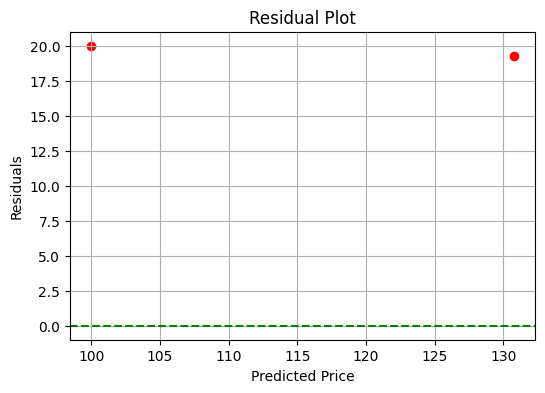

In [136]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


this is linear.the points are mostly around the zero line, so the model fits the data well.

_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [137]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below

# Part 1 -> 1

In [138]:
y_pred = (y_prob >= 0.5).astype(int)
print("Predictions:", y_pred)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

precision = precision_score(y_true, y_pred)
print("Precision:", precision)

recall = recall_score(y_true, y_pred)
print("Recall:", recall)

f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

Predictions: [1 0 1 0 1 0 1 0 1 0]
Confusion Matrix:
 [[5 0]
 [0 5]]
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# part 1-> 2

In [139]:
# Threshold 0.3
y_pred_03 = (y_prob >= 0.3).astype(int)
print("Predictions with threshold 0.3:", y_pred_03)

cm_03 = confusion_matrix(y_true, y_pred_03)
print("Confusion Matrix with threshold 0.3:\n", cm_03)

precision_03 = precision_score(y_true, y_pred_03)
print("Precision:", precision_03)


recall_03 = recall_score(y_true, y_pred_03)
print("Recall:", recall_03)


f1_03 = f1_score(y_true, y_pred_03)
print("F1 Score:", f1_03)


Predictions with threshold 0.3: [1 0 1 0 1 1 1 1 1 0]
Confusion Matrix with threshold 0.3:
 [[3 2]
 [0 5]]
Precision: 0.7142857142857143
Recall: 1.0
F1 Score: 0.8333333333333334


Lowering the threshold from 0.5 to 0.3 increases the number of predicted positives, then Recall increases cause all actual positives are now correctly identified, precision decreases cause some negatives are incorrectly predicted as positives.It happen cause a lower threshold makes the model more sensitive to predicting positives.

# Part 2: ROC and AUC

# task 4

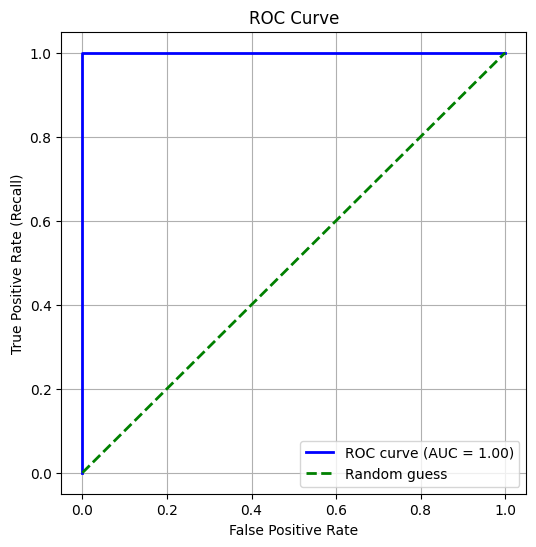

In [140]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# task 5

In [141]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_true, y_prob)

print(f"AUC: {roc_auc:.3f}")


AUC: 1.000


# task 6

A high AUC means-> the model predicts positive and negative cases very well.

A low AUC means-> the model is not good and it is just guess.

# Part 3 -> Decision Tree on a small dataset

# task 7

In [142]:
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

X = df3[["hours"]]
y = df3["passed"]

dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X, y)

print("Predicted classes:", dt.predict(X))

Predicted classes: [0 0 0 1 1 0 0 0 1 1]


# task 8

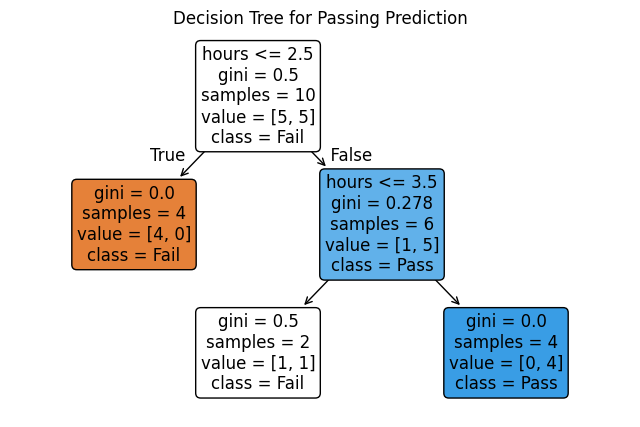

In [143]:
# Cell 8
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
tree.plot_tree(
    dt,
    feature_names=["hours"],
    class_names=["Fail","Pass"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree for Passing Prediction")
plt.show()


# task 9

The tree is very simple, max_depth=2, so it is unlikely to overfit.The dataset is small, but the tree should generalize reasonably well. With tghis small dataset, predictions might still change if the data changes a little.


_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._